
# Praćenje kretanja poljoprivredne mašine - GPS


Datoteke 

- 'data/gps_data_1.csv' - kretanje po parceli
- 'data/gps_data_2.csv' - kretanje po naselju
- 'data/gps_data_3.csv' - mirovanje

sadrže merenja po 3000 uzoraka čiji je format dat u nastavku:

```
#longitude, latitude, speed, pritisak, ddMMyy, hhmmss.ssss, cog, temperature, fix_status, protok
#---------------------------------------------------------------------------------
19.9908883333	45.4304116667	9.852	22.8	211116	093502.000	297.18	18.8	2	11.70
19.9908283333	45.4304333333	9.831	22.6	211116	093504.000	297.02	18.9	2	11.64
19.9907666667	45.430455	9.3	22.6	211116	093506.000	299.53	18.9	2	11.64
19.99064	45.4305033333	9.26	22.6	211116	093510.000	297.49	19.0	2	12.02
19.99058	45.430525	9.373	22.8	211116	093512.000	299.55	19.0	2	11.45
19.9905216667	45.4305483333	9.295	22.8	211116	093514.000	296.18	19.0	2	11.39
19.9904616667	45.43057	10.027	22.6	211116	093516.000	301.14	19.0	2	11.64
19.9904	45.4305916667	10.127	22.9	211116	093518.000	293.80	19.0	2	11.34

```


In [63]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as linalg
%matplotlib inline
import pandas as pd
from matplotlib.patches import Circle

np.set_printoptions(precision=3)

In [64]:
with open('data/gps_data_1.csv', 'r') as f:
    data = f.read()
#print data
geo = []
lines = data.split('\n')
for line in lines:
    parts = line.split('\t')
    if len(parts)>1:
        geo.append(np.array([float(parts[0]), float(parts[1]), float(parts[2])]))

geo = np.array(geo)

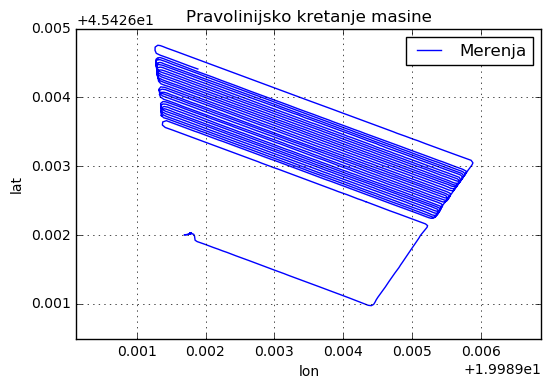

In [65]:
plt.plot(geo[:,0], geo[:,1], color='b', label='Merenja');
plt.legend()
plt.title('Pravolinijsko kretanje masine')
plt.xlabel('lon')
plt.ylabel('lat')
plt.axis('equal')
plt.grid(True)

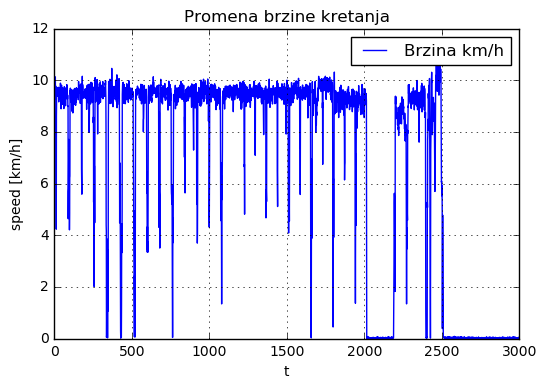

In [66]:
speed = geo[:,2]
t = np.arange(0, len(speed))

plt.plot(t, speed, color='b', label='Brzina km/h');
plt.legend()
plt.title('Promena brzine kretanja')
plt.xlabel('t')
plt.ylabel('speed [km/h]')
plt.grid(True)              


Kvadrat razlika odstupanja modela i merenja: 0.10083236372m
Max greska je: 0.224848257378m
Duzina reda je: 370.78380248m


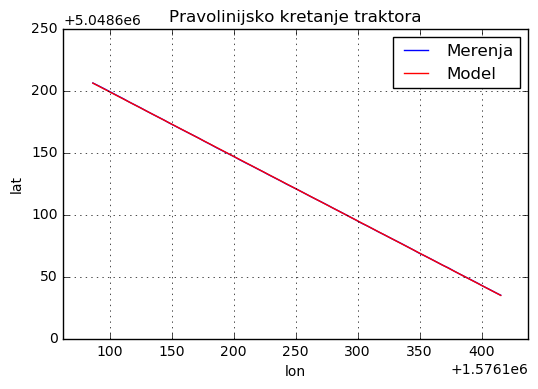

In [71]:
#       dlat        dlong
#30°	110.852 km	96.486 km
#45°	111.132 km	78.847 km
klon = 78847
klat = 111132

lon = klon*geo[15:85,0]
lat = klat*geo[15:85,1]

p = np.polyfit(lon, lat, 1)
latModel = np.polyval(p, lon)

errs = (latModel - lat)**2
err = np.mean(errs)
print 'Kvadrat razlika odstupanja modela i merenja: '+str(np.sqrt(err))+'m'
print 'Max greska je: '+str(np.sqrt(np.max(errs)))+'m'
print 'Duzina reda je: '+str(np.sqrt((lon[0]-lon[-1])**2+(lat[0]-lat[-1])**2))+'m'

plt.plot(lon, lat, color='b', label='Merenja');
plt.plot(lon, latModel, color='r', label='Model');
plt.legend()
plt.title('Pravolinijsko kretanje traktora')
plt.xlabel('lon')
plt.ylabel('lat')
plt.axis('equal')
plt.grid(True)

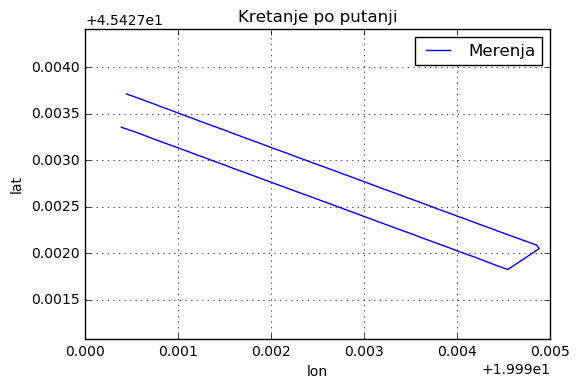

In [85]:
speedFilter = geo[15:172,2]>8
sf = 15+ np.where(speedFilter)[0]

plt.plot(geo[sf,0], geo[sf,1], color='b', label='Merenja');
plt.legend()
plt.title('Kretanje po putanji')
plt.xlabel('lon')
plt.ylabel('lat')
plt.axis('equal')
plt.grid(True)

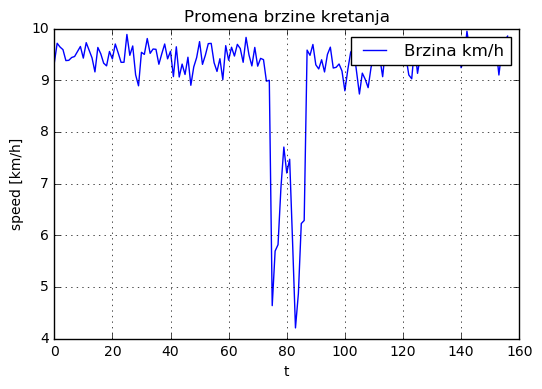

In [7]:
speed = geo[15:172,2]
t = np.arange(0, len(speed))

plt.plot(t, speed, color='b', label='Brzina km/h');
plt.legend()
plt.title('Promena brzine kretanja')
plt.xlabel('t')
plt.ylabel('speed [km/h]')
plt.grid(True)       

In [8]:
with open('data/gps_data_2.csv', 'r') as f:
    data = f.read()
#print data
geo = []
lines = data.split('\n')
for line in lines:
    parts = line.split('\t')
    if len(parts)>1:
        geo.append(np.array([float(parts[0]), float(parts[1])]))

geo = np.array(geo)

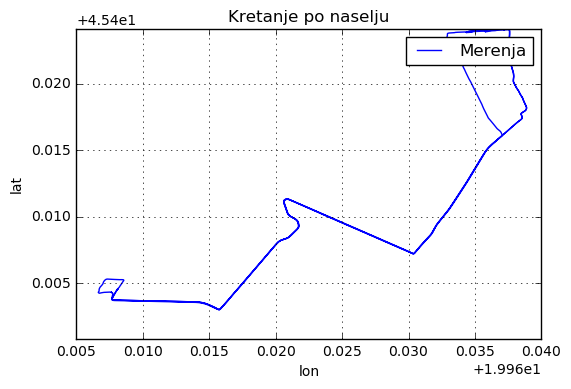

In [9]:
plt.plot(geo[:,0], geo[:,1], color='b', label='Merenja');
plt.legend()
plt.title('Kretanje po naselju')
plt.xlabel('lon')
plt.ylabel('lat')
plt.axis('equal')
plt.grid(True)

In [10]:
with open('data/gps_data_3.csv', 'r') as f:
    data = f.read()
#print data
geo = []
lines = data.split('\n')
for line in lines:
    parts = line.split('\t')
    if len(parts)>1:
        geo.append(np.array([float(parts[0]), float(parts[1])]))

geo = np.array(geo)

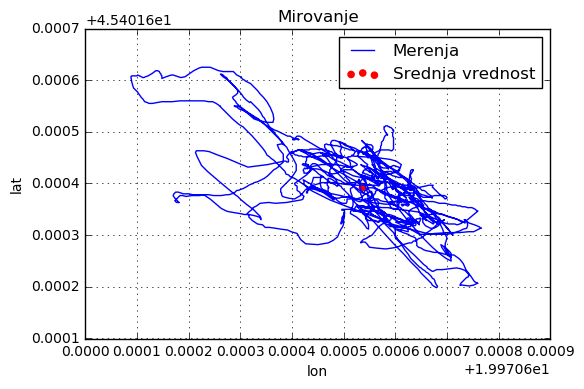

In [11]:
lonMean = geo[:,0].mean()
latMean = geo[:,1].mean()

plt.plot(geo[:,0], geo[:,1], color='b', label='Merenja');
plt.scatter([lonMean], [latMean], color='r', label='Srednja vrednost');
plt.legend()
plt.title('Mirovanje')
plt.xlabel('lon')
plt.ylabel('lat')
plt.axis('equal')
plt.grid(True)

In [39]:
import math
from math import sin, cos, atan2, sqrt

def distance(a, b):
    lng1, lat1 = a
    lng2, lat2 = b
    #return distance as meter if you want km distance, remove "* 1000"
    radius = 6371 * 1000 

    dLat = (lat2-lat1) * math.pi / 180
    dLng = (lng2-lng1) * math.pi / 180

    lat1 = lat1 * math.pi / 180
    lat2 = lat2 * math.pi / 180

    val = sin(dLat/2) * sin(dLat/2) + sin(dLng/2) * sin(dLng/2) * cos(lat1) * cos(lat2)    
    ang = 2 * atan2(sqrt(val), sqrt(1-val))
    return radius * ang

def distance2(a,b):
    #       dlat        dlong
    #30°	110.852 km	96.486 km
    #45°	111.132 km	78.847 km
    klon = 78847
    klat = 111132
    dlon = (klon*(a[0]-b[0]))**2
    dlat = (klat*(a[1]-b[1]))**2
    return np.sqrt(dlon+dlat)
    #return dlon+dlat


In [40]:
import time
d1 = []
d2 = []

start = time.time()
for p in geo[:,0:2]:
    dd1 = distance(p, (lonMean, latMean))
    d1.append(dd1)
timespan = time.time() - start
print timespan 
    
start = time.time()   
for p in geo[:,0:2]:
    dd2 = distance2(p, (lonMean, latMean))
    d2.append(dd2)

timespan = time.time() - start
print timespan 

d1 = np.array(d1)
d2 = np.array(d2)

print d1.mean()
print d2.mean()


0.0388970375061
0.0129239559174
10.16419468
10.217632455


In [41]:
t = np.arange(0, len(d1))

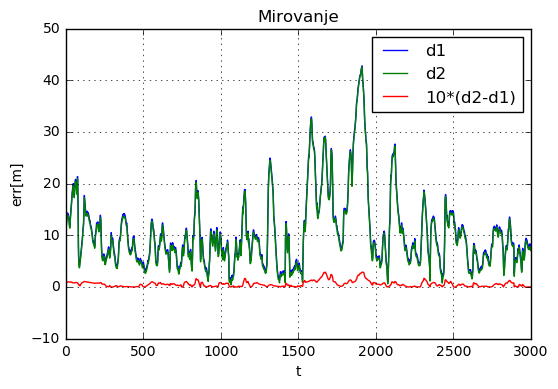

In [46]:
plt.plot(t, d1+0.5, color='b', label='d1');
plt.plot(t, d2, color='g', label='d2');
plt.plot(t, 10*(d2-d1), color='r', label='10*(d2-d1)');
plt.legend()
plt.title('Mirovanje')
plt.xlabel('t')
plt.ylabel('err[m]')
plt.grid(True)

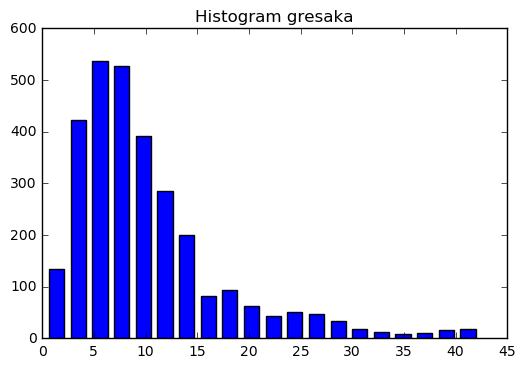

In [16]:
plt.title('Histogram gresaka')
hist, bins = np.histogram(d1, bins=20)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()